#  국가 통계 포털

- 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
-  https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

- 2014년 1분기~ 2018년 4분기

## 가설
- K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?

* K-Beauty란? https://en.wikipedia.org/wiki/K-Beauty
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )


# 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os 
if os.name == "posix":
    # Mac
    sns.set(font="AppleGothic")
elif os.name == "nt":
    # Window
    sns.set(font="Malgun Gothic")

In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보임
# 폰트의 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = 'retina'

# 데이터 로드하기

In [4]:
df_raw=pd.read_csv("국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20210629194505.csv",encoding="cp949")
df_raw.head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4,2021 1/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,974060,1251122,1345723,1526135,1881628,1529955,1284863,1650010,1517553,1178153
1,합계,합계,면세점,-,-,-,-,-,-,-,...,770656,1070693,1157158,1336372,1655635,1297490,1051987,1410967,1247495,972384
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,203404,180429,188565,189763,225993,232465,232876,239043,270058,205769
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,4511,3702,4038,3670,3827,4142,3814,7716,3583,4231
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,215,2,0,1,70,113,0,3497,0,0


In [5]:
df_raw.shape

(450, 32)

In [6]:
df_raw["국가(대륙)별"].value_counts()

일본            45
중남미           45
중동            45
아세안(ASEAN)    45
대양주           45
미국            45
중국            45
합계            45
기타            45
유럽연합(EU)      45
Name: 국가(대륙)별, dtype: int64

In [7]:
df_raw[df_raw["국가(대륙)별"]=="미국"]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4,2021 1/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,48978,40985,44973,55512,54054,49155,66057,67693,72531,60887
46,미국,합계,면세점,-,-,-,-,-,-,-,...,2079,2657,2951,1818,1481,698,339,81,67,56
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,46899,38328,42022,53694,52573,48457,65718,67612,72464,60831
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,1774,1298,1408,1653,1383,1182,1631,1866,1368,1636
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,1,0,0,0,0,0,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,1773,1298,1408,1653,1383,1182,1631,1866,1368,1636
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,1886,1845,1837,3166,1787,1830,2824,3291,2177,1917
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,52,66,116,107,49,12,2,5,1,1
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,1834,1779,1721,3059,1738,1818,2822,3286,2176,1916
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,269,88,156,118,338,135,182,212,330,173


# 분석과 시각화를 위한 tidy data 만들기

In [17]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4', '2020 1/4', '2020 2/4', '2020 3/4',
       '2020 4/4', '2021 1/4 p)'],
      dtype='object')

In [18]:
df=df_raw.melt(id_vars=["국가(대륙)별","상품군별","판매유형별"],var_name="기간",value_name="백만원")
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [19]:
df.shape

(13050, 5)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13050 entries, 0 to 13049
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  13050 non-null  object
 1   상품군별     13050 non-null  object
 2   판매유형별    13050 non-null  object
 3   기간       13050 non-null  object
 4   백만원      13050 non-null  object
dtypes: object(5)
memory usage: 509.9+ KB


# 데이터 전처리

## 기간에서 연도를 분리하기

In [34]:
df["기간"]

0           2014 1/4
1           2014 1/4
2           2014 1/4
3           2014 1/4
4           2014 1/4
            ...     
13045    2021 1/4 p)
13046    2021 1/4 p)
13047    2021 1/4 p)
13048    2021 1/4 p)
13049    2021 1/4 p)
Name: 기간, Length: 13050, dtype: object

In [38]:
# p는 잠정치
df["기간"].map(lambda x : (x.split()[-1]))

0        1/4
1        1/4
2        1/4
3        1/4
4        1/4
        ... 
13045     p)
13046     p)
13047     p)
13048     p)
13049     p)
Name: 기간, Length: 13050, dtype: object

In [14]:
df["연도"]=df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [15]:
df["분기"]=df["기간"].map(lambda x: int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


## 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [16]:
#numpy를 부르지 않음, 판다스 내부에 있는 numpy
df["백만원"]=df["백만원"].replace("-",np.nan).astype("float") 
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


## 필요없는 데이터 제거하기


In [17]:
df=df[(df["국가(대륙)별"] !="합계")&(df["상품군별"] !="합계")].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 48 to 13049
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10962 non-null  object 
 1   상품군별     10962 non-null  object 
 2   판매유형별    10962 non-null  object 
 3   기간       10962 non-null  object 
 4   백만원      7938 non-null   float64
 5   연도       10962 non-null  int64  
 6   분기       10962 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 685.1+ KB


In [18]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1


In [19]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# K-Beauty 시각화

## 전체 상품군 판매액

In [20]:
df_total=df[df["판매유형별"]=="계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


In [21]:
df_total.shape

(3654, 7)

<AxesSubplot:xlabel='연도', ylabel='백만원'>

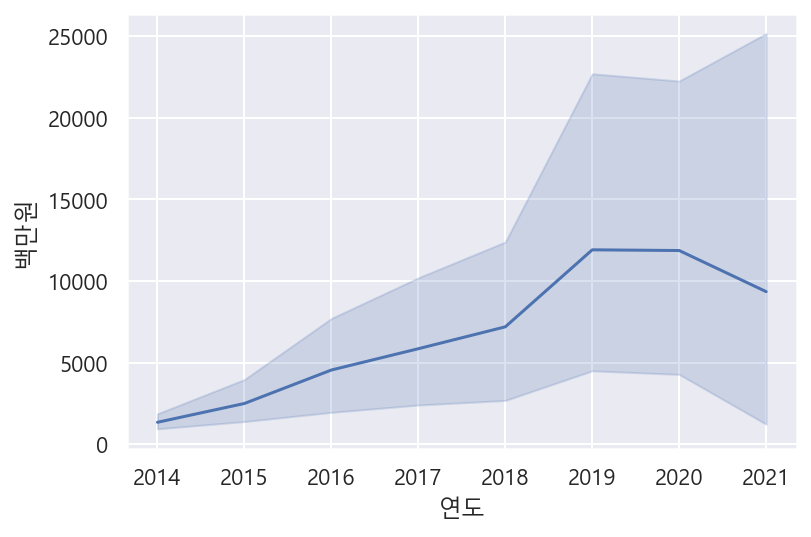

In [22]:
sns.lineplot(data=df_total,x="연도",y="백만원")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

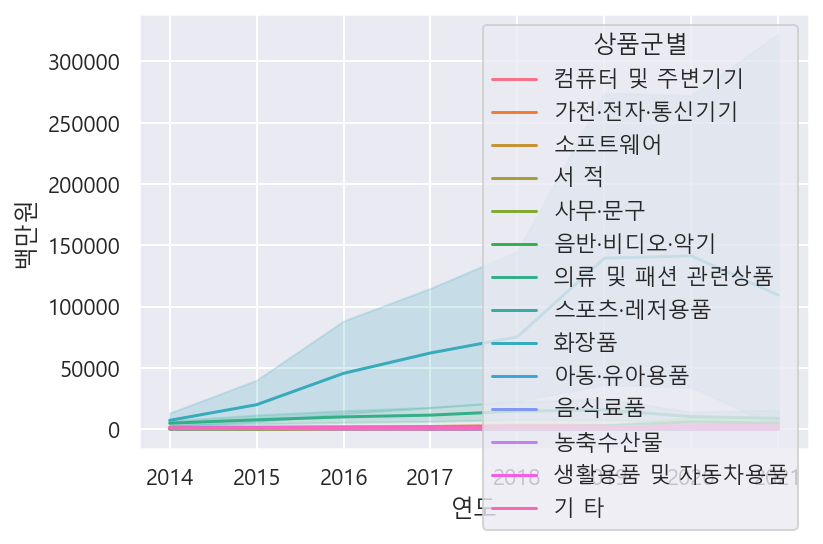

In [23]:
sns.lineplot(data=df_total,x="연도",y="백만원",hue="상품군별")

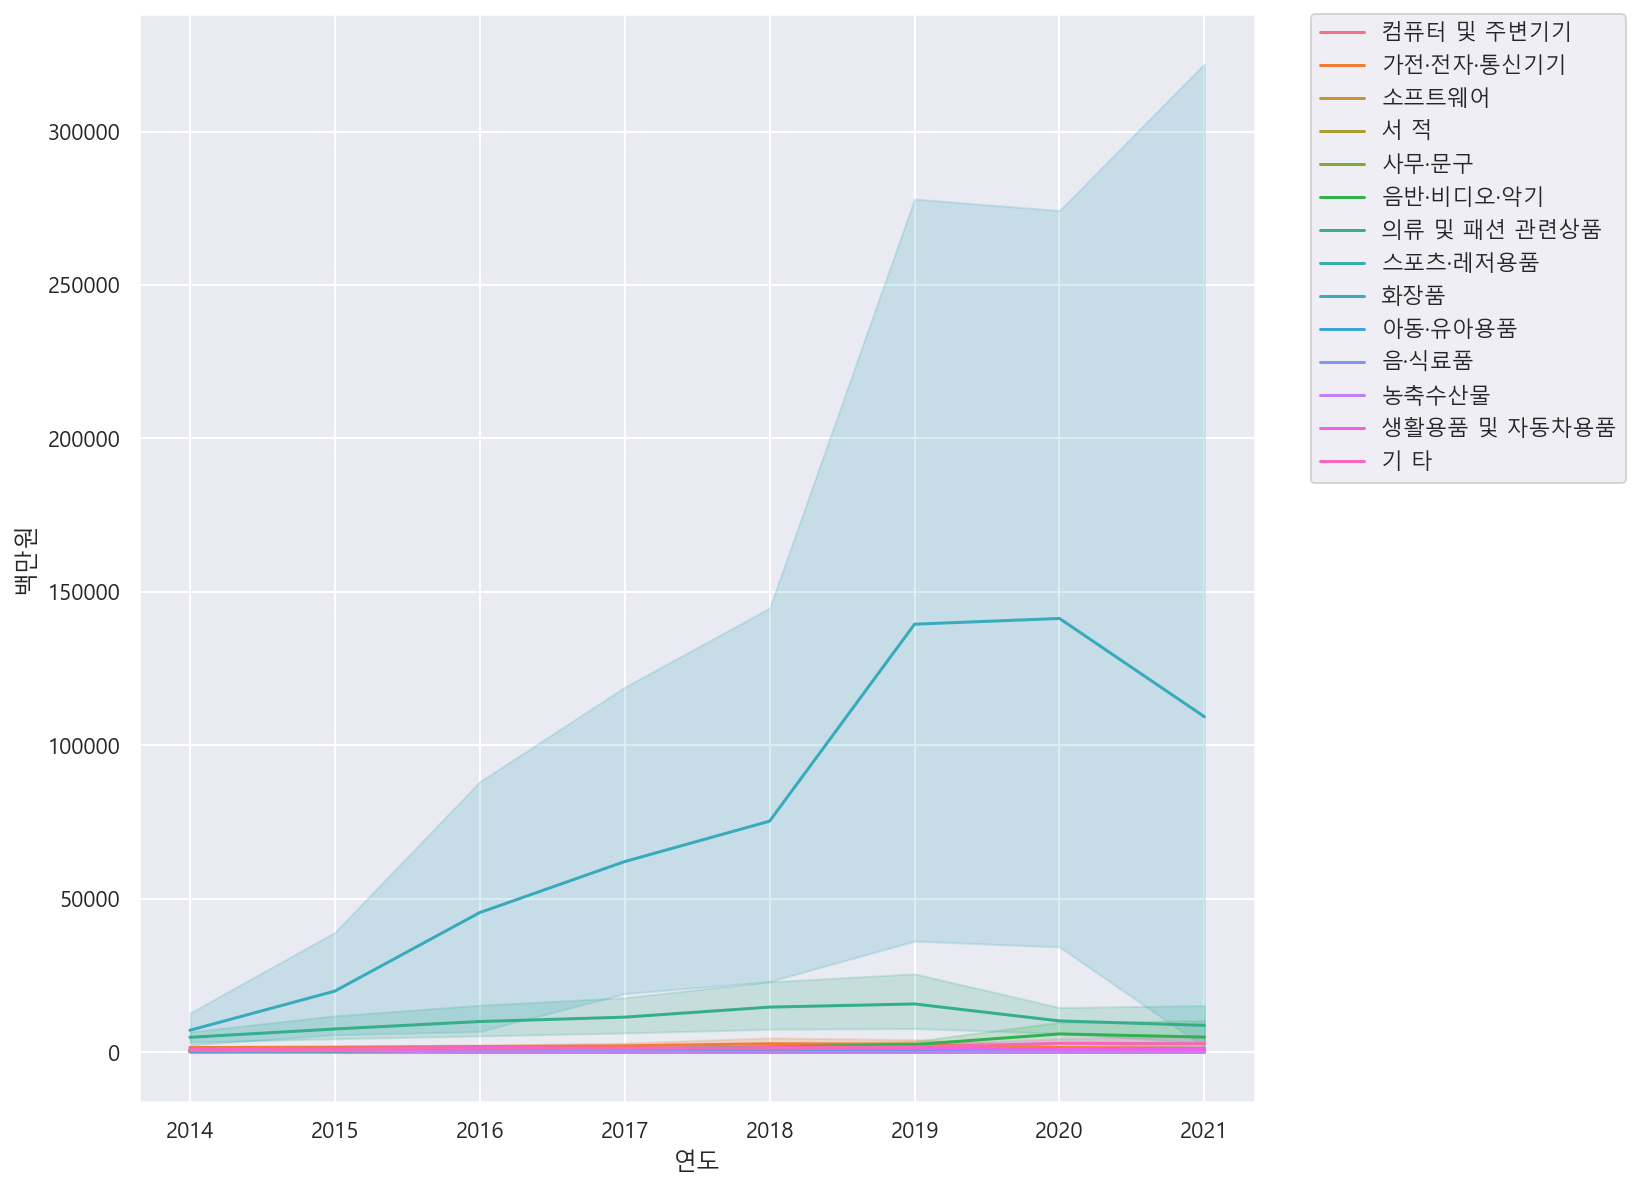

In [24]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df_total,x="연도",y="백만원",hue="상품군별")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.) #legend값을 밖으로 해주기 위해서 다음과 같이 한다.


- 화장품 상품군이 증가했다가 줄어들었음

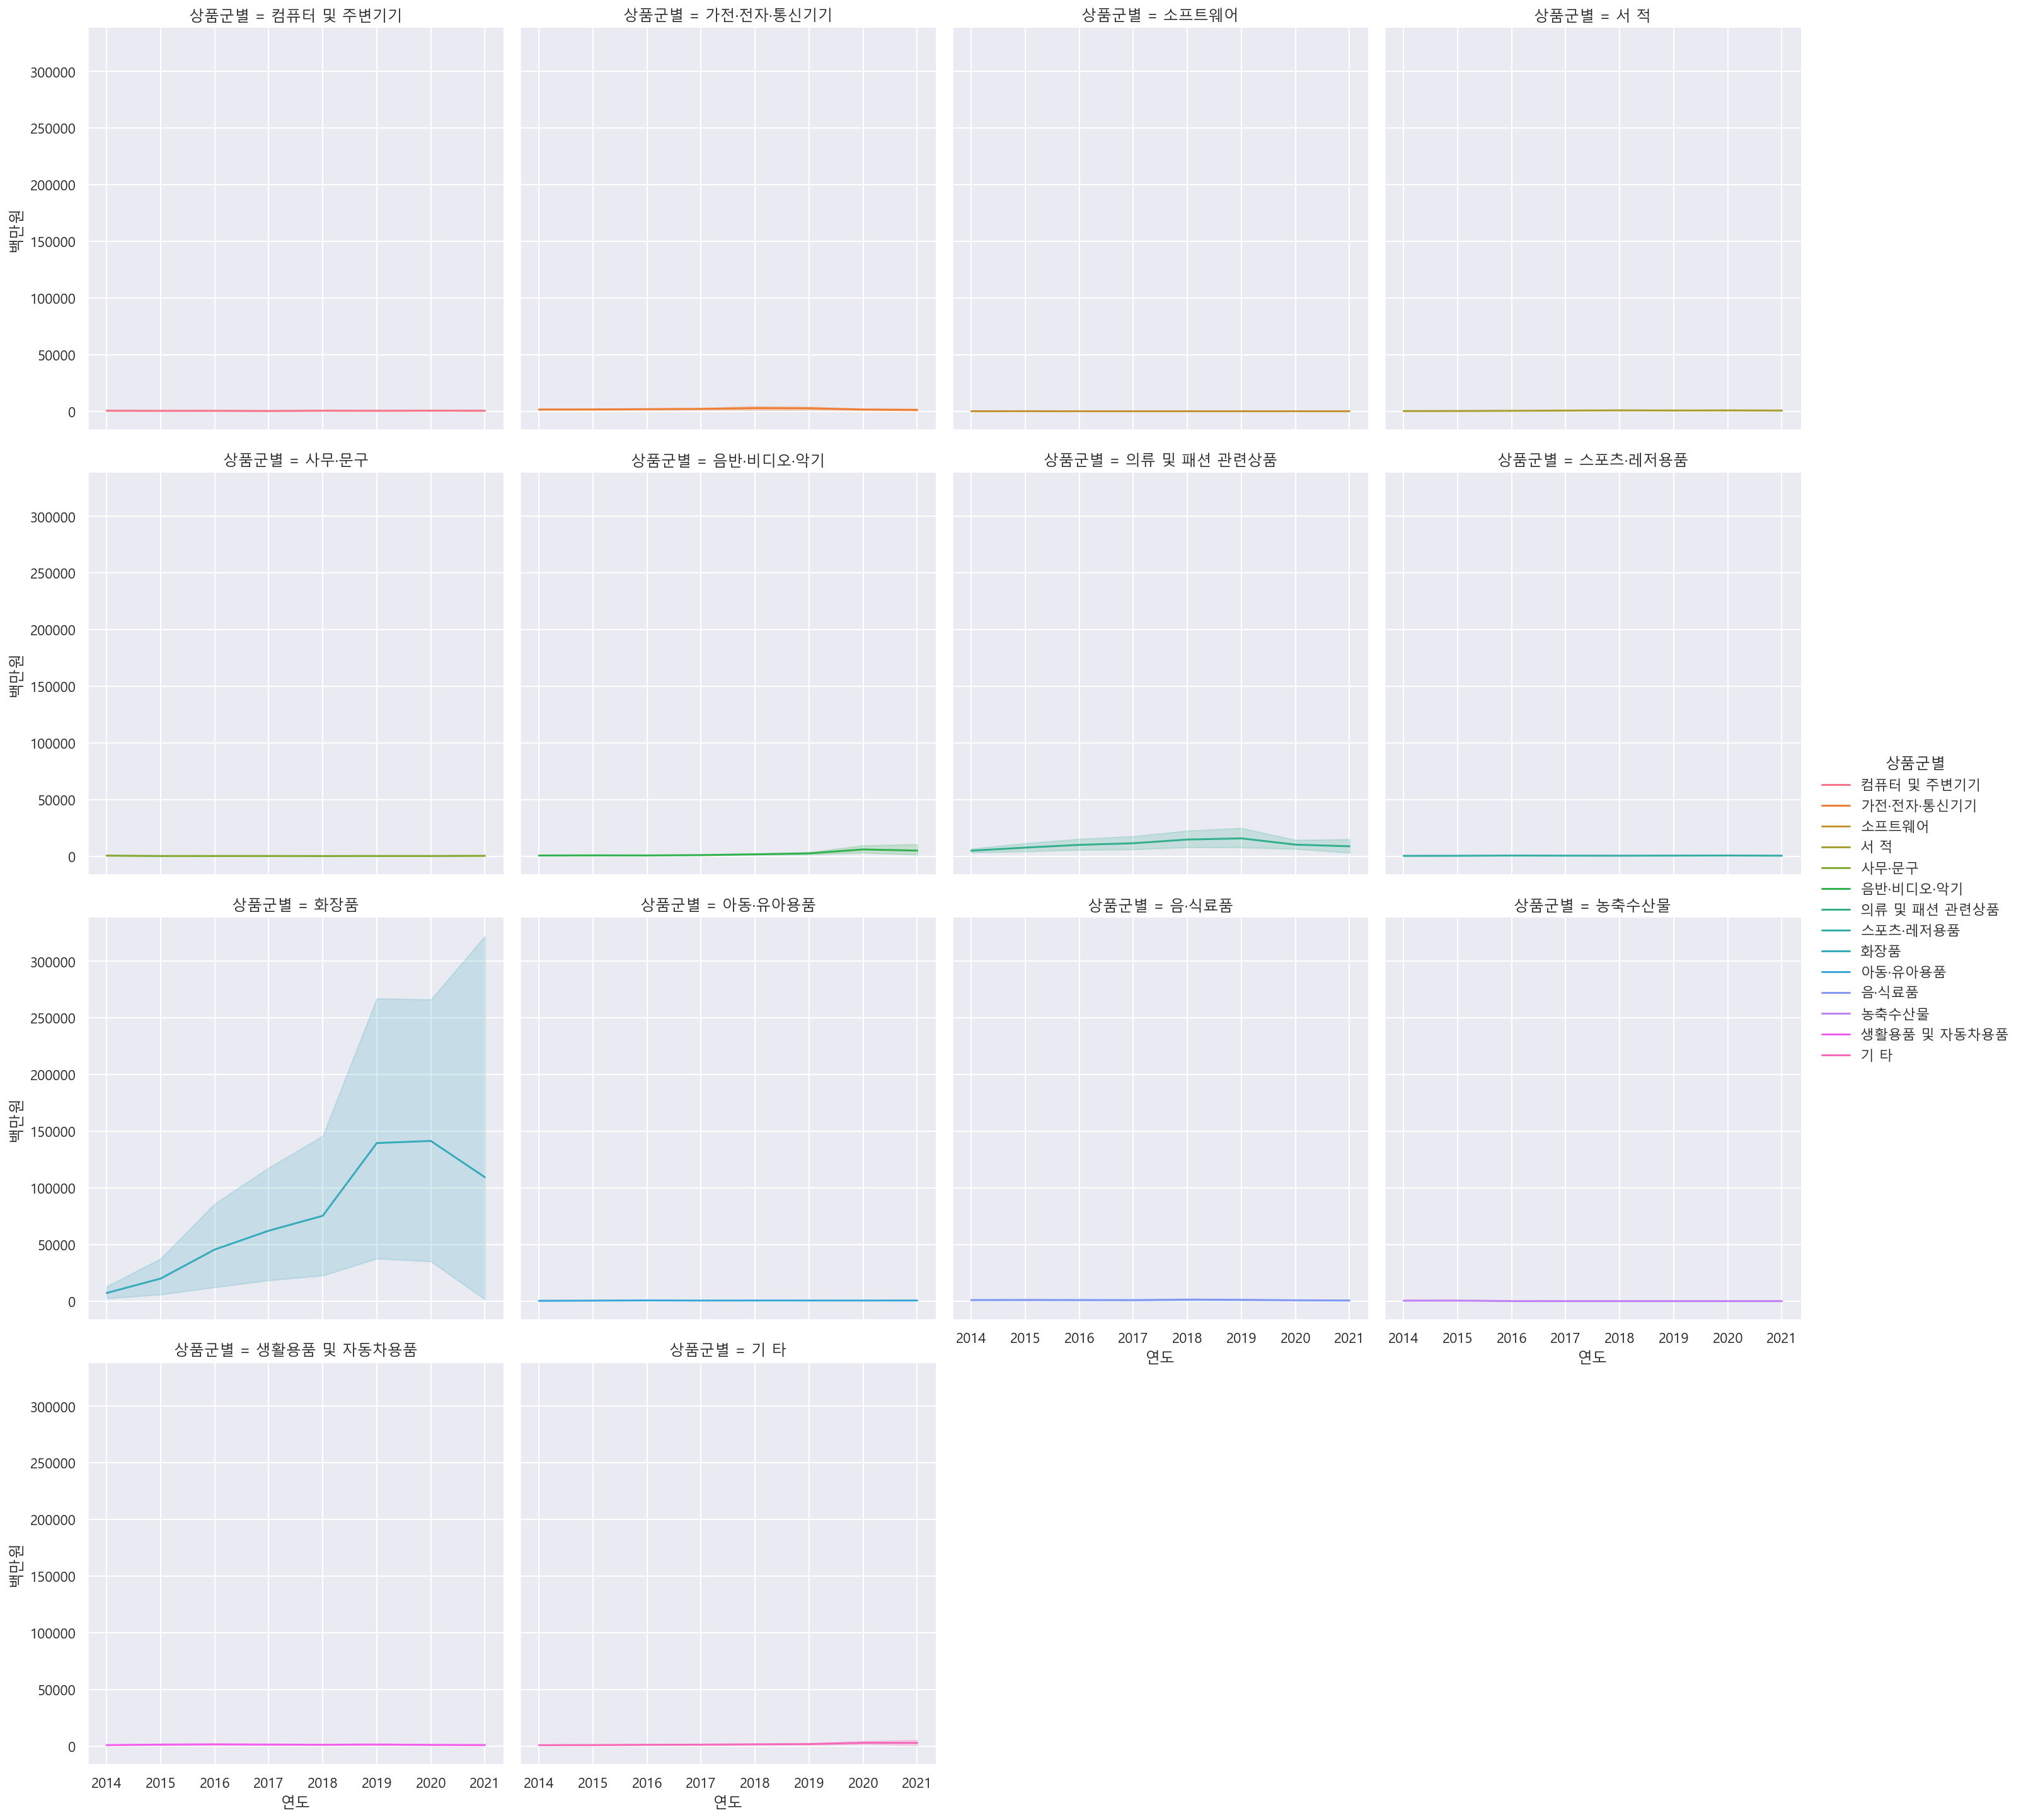

In [36]:
sns.relplot(data=df_total,x="연도",y="백만원",hue="상품군별",kind="line",col="상품군별",col_wrap=4)

In [37]:
#화장품을 제외하고 보기

df_sub=df_total[~df_total["상품군별"].isin(["화장품"])].copy()
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
13035,기타,아동·유아용품,계,2021 1/4 p),996.0,2021,1
13038,기타,음·식료품,계,2021 1/4 p),82.0,2021,1
13041,기타,농축수산물,계,2021 1/4 p),1.0,2021,1
13044,기타,생활용품 및 자동차용품,계,2021 1/4 p),338.0,2021,1


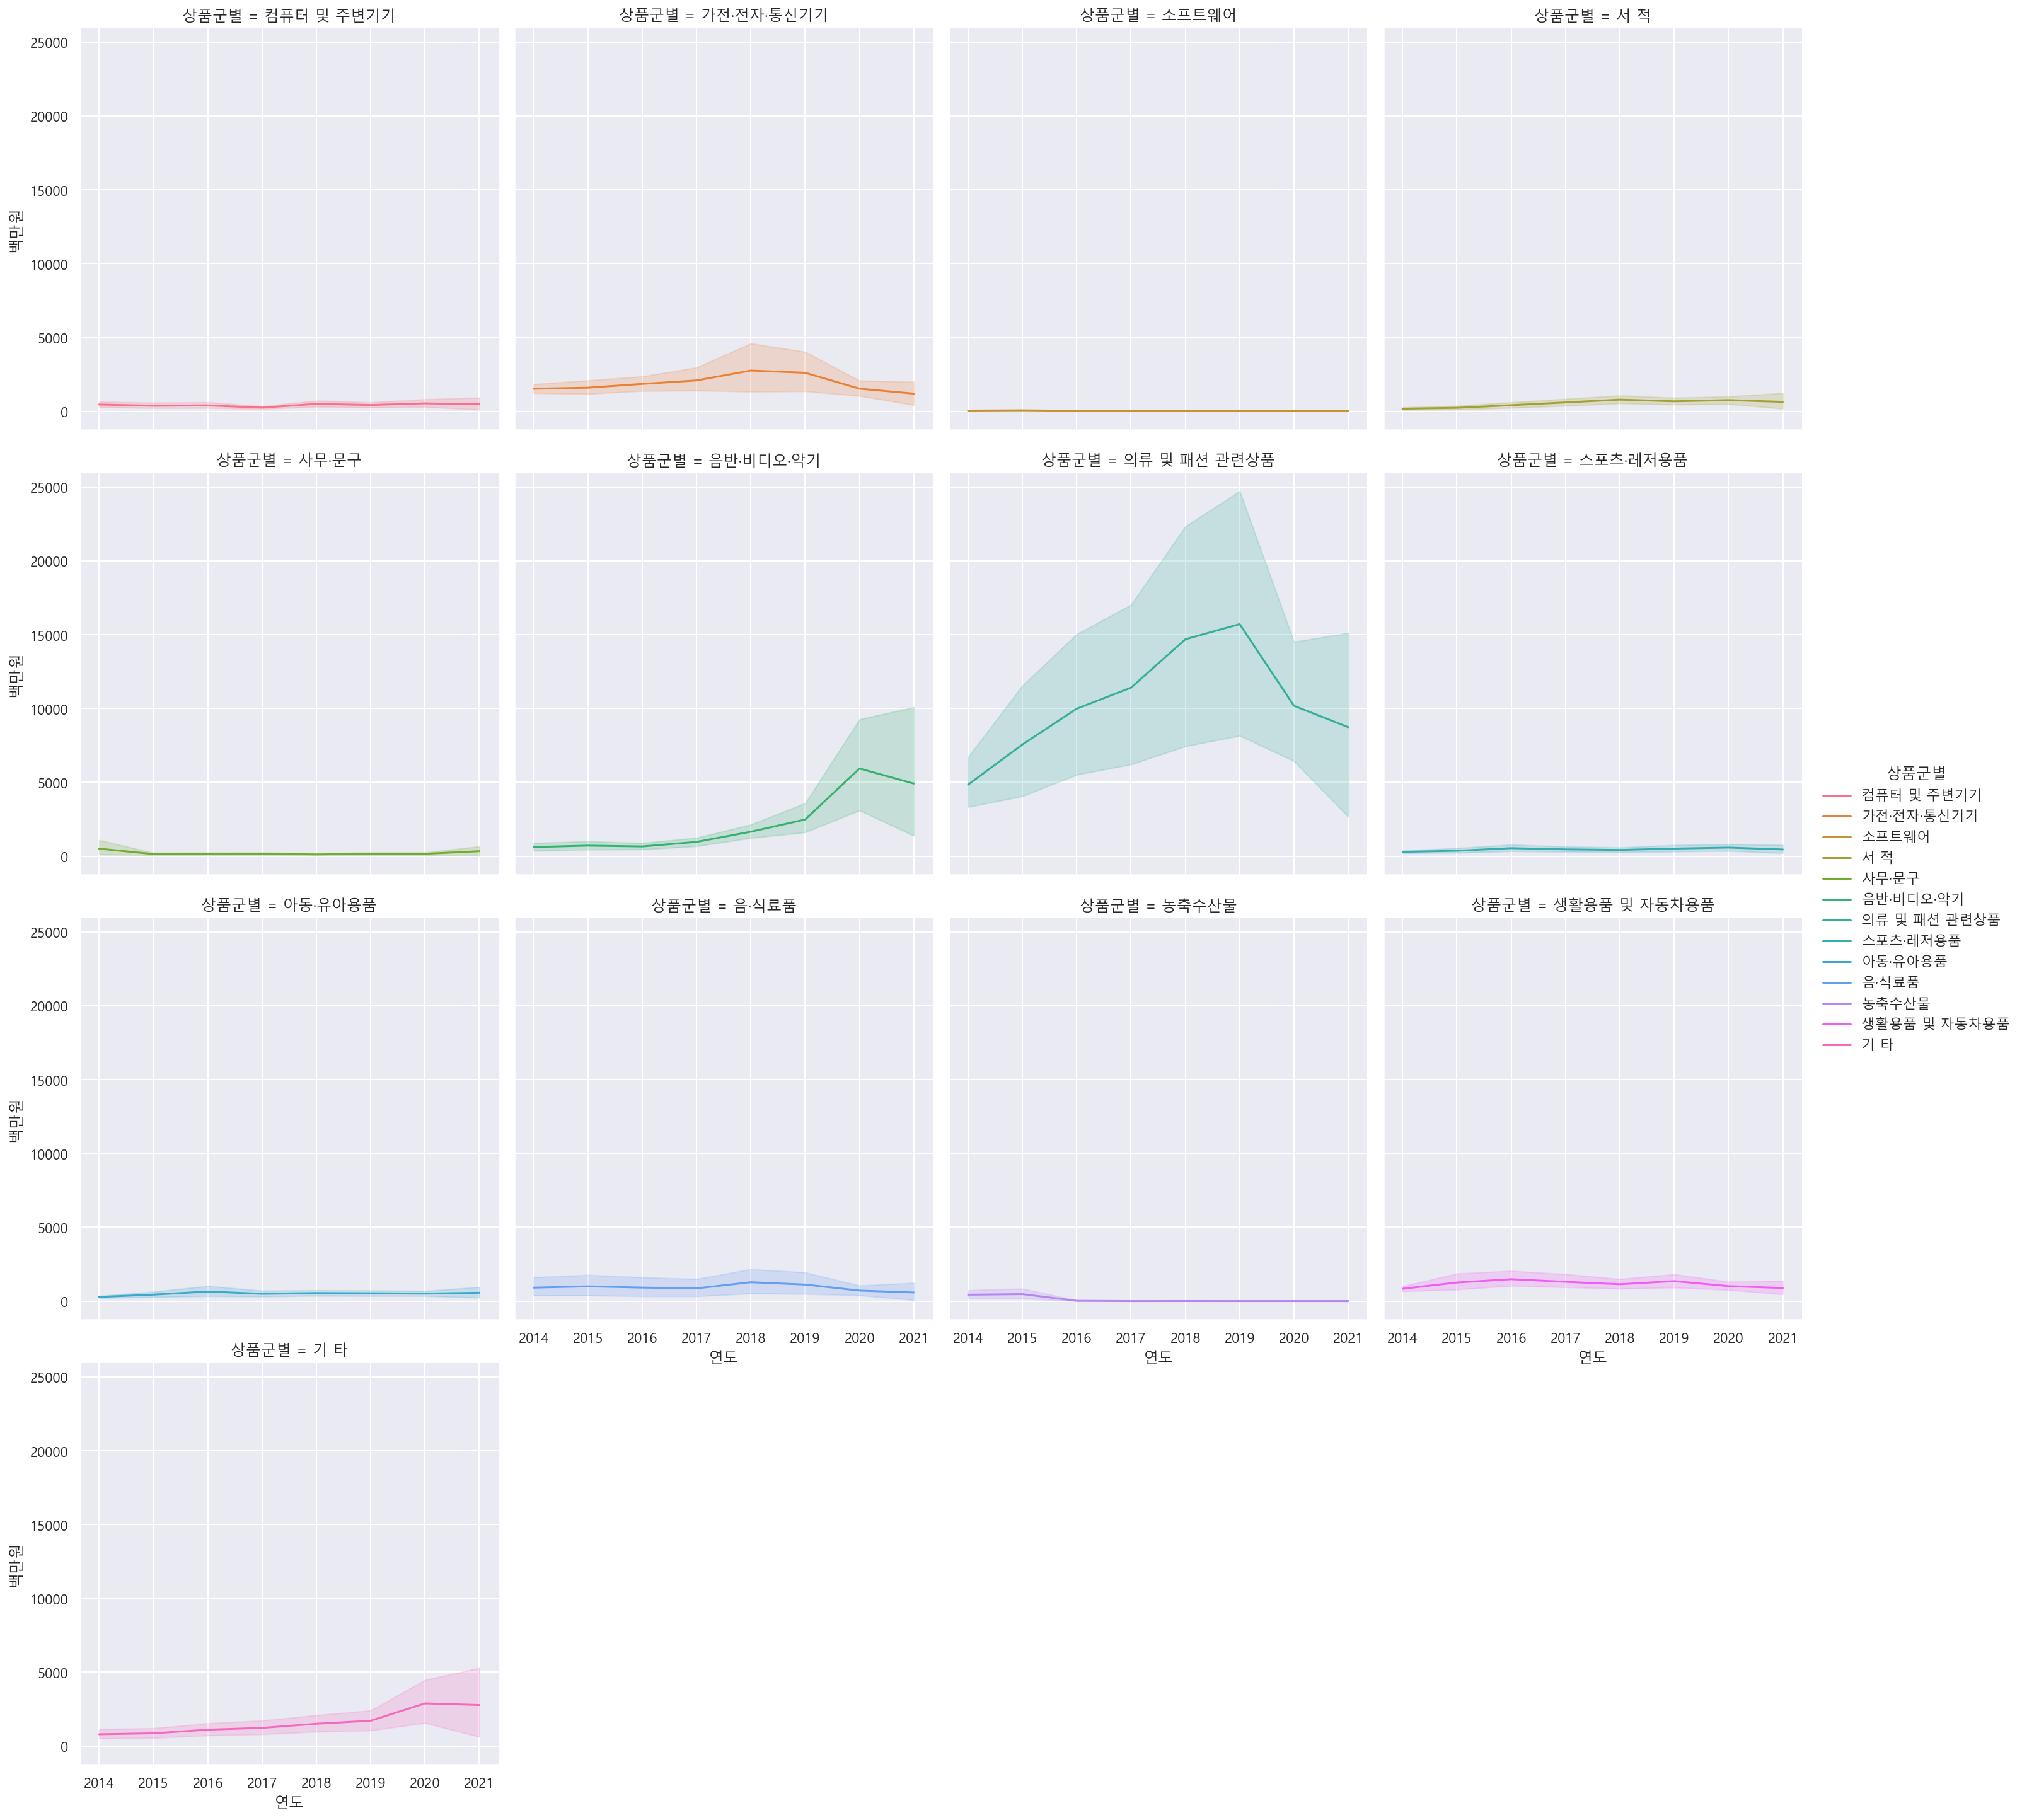

In [38]:
sns.relplot(data=df_sub,x="연도",y="백만원",hue="상품군별",kind="line",col="상품군별",col_wrap=4)

- 2019년 까지 화장품 제외하니 의류 및 패션도 증가하다가 감소하는것을 알수있다.

- 의류 및 패션을 제외하고 진행

In [39]:
df_sub2=df_sub[~df_sub["상품군별"].isin(["의류 및 패션 관련상품"])].copy()
df_sub2

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
13035,기타,아동·유아용품,계,2021 1/4 p),996.0,2021,1
13038,기타,음·식료품,계,2021 1/4 p),82.0,2021,1
13041,기타,농축수산물,계,2021 1/4 p),1.0,2021,1
13044,기타,생활용품 및 자동차용품,계,2021 1/4 p),338.0,2021,1


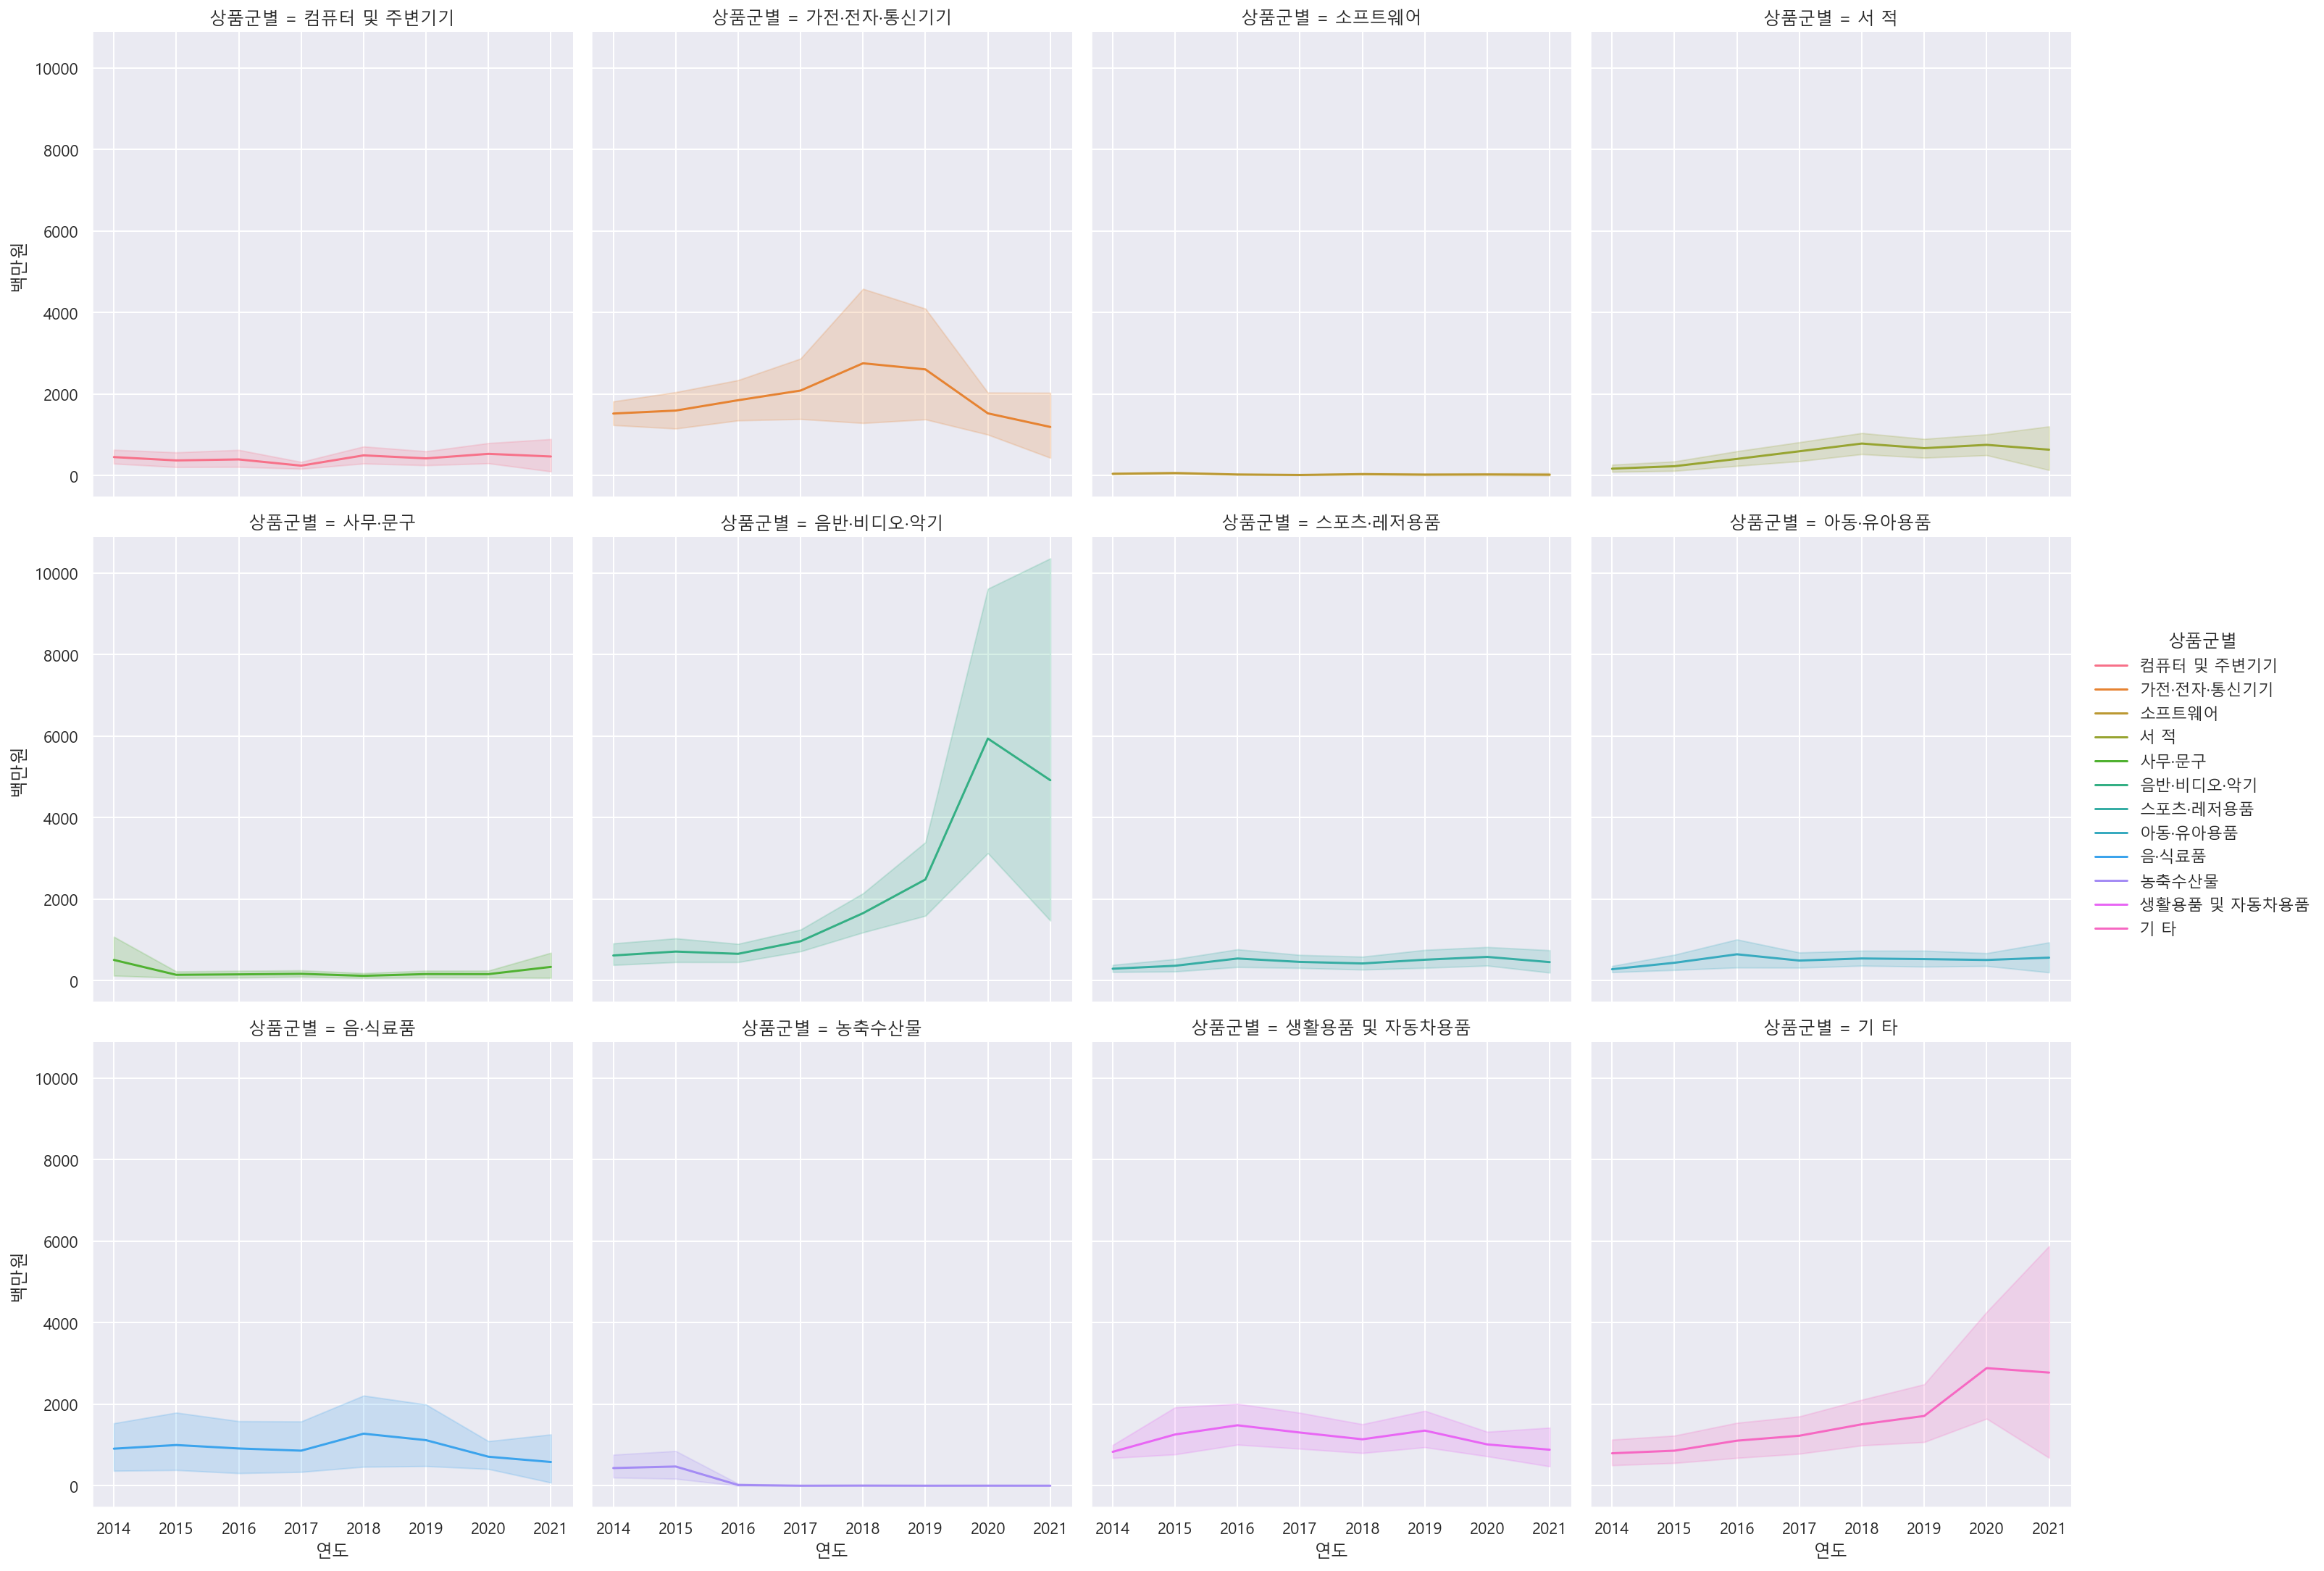

In [40]:
sns.relplot(data=df_sub2,x="연도",y="백만원",hue="상품군별",kind="line",col="상품군별",col_wrap=4)

- 가전전자통신기기, 음반 비디오 악기. 기타, 서적도 주춤했지만 증가추세
- 화장품과 의류 및 패션 관련 상품이 굉장히 증가하고 있다.

## 화장품의 온라인쇼핑 해외직접판매액

In [46]:
df_cosmetic=df_total[df_total["상품군별"]=="화장품"].copy()
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,유럽연합(EU),화장품,계,2014 1/4,937.0,2014,1


In [50]:
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

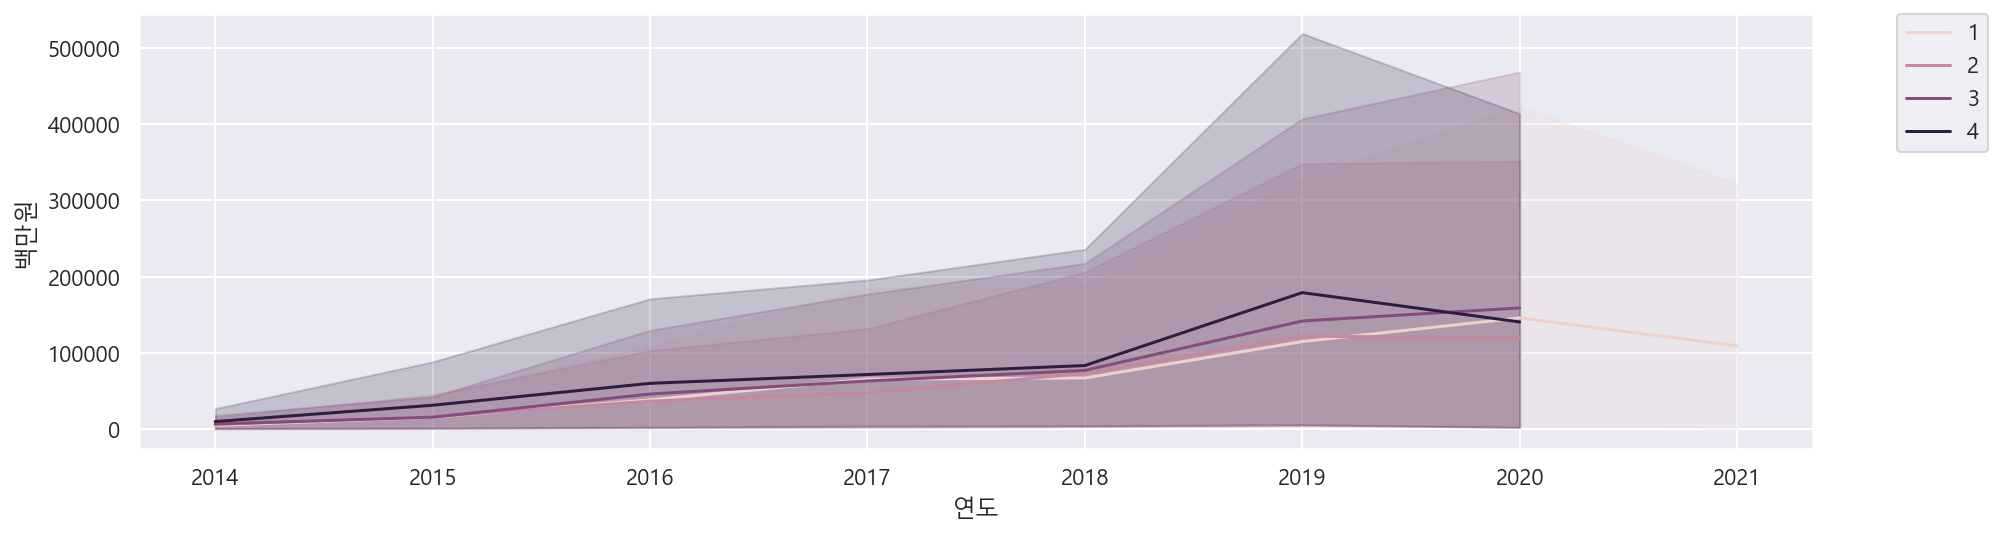

In [54]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_cosmetic,x="연도",y="백만원",hue="분기")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.) #legend값을 밖으로 해주기 위해서 다음과 같이 한다.

<AxesSubplot:xlabel='기간', ylabel='백만원'>

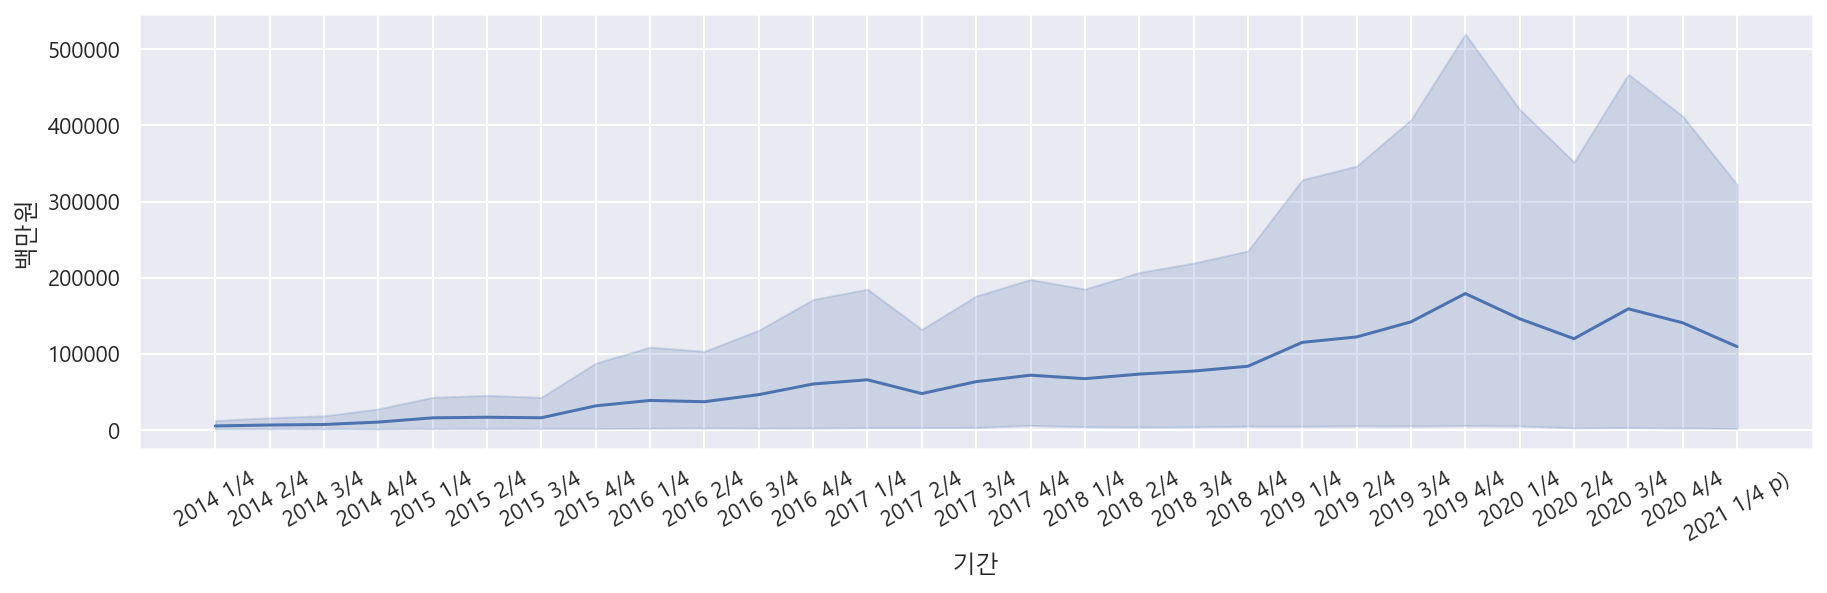

In [57]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic,x="기간",y="백만원")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

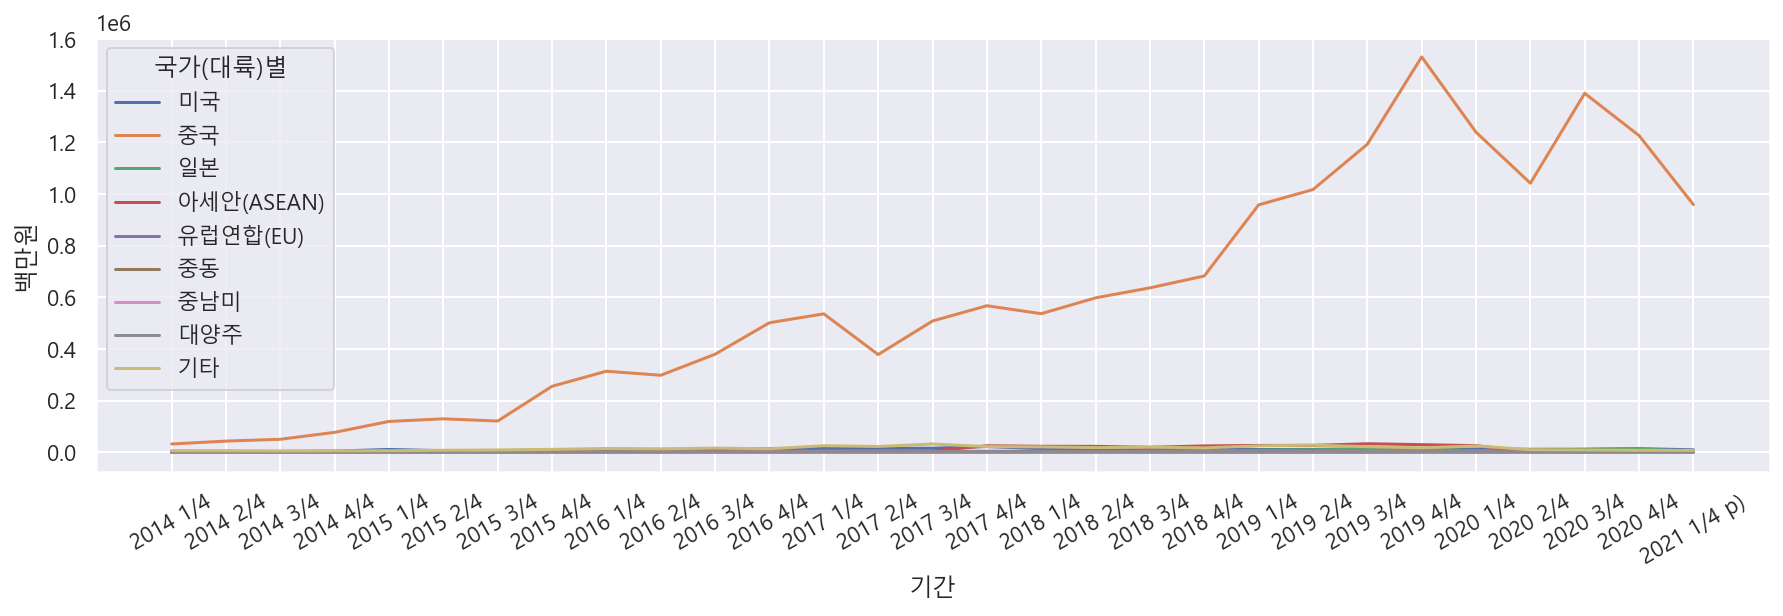

In [58]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic,x="기간",y="백만원",hue="국가(대륙)별")

- 중국이 온라인으로 많이 구매

<AxesSubplot:xlabel='기간', ylabel='백만원'>

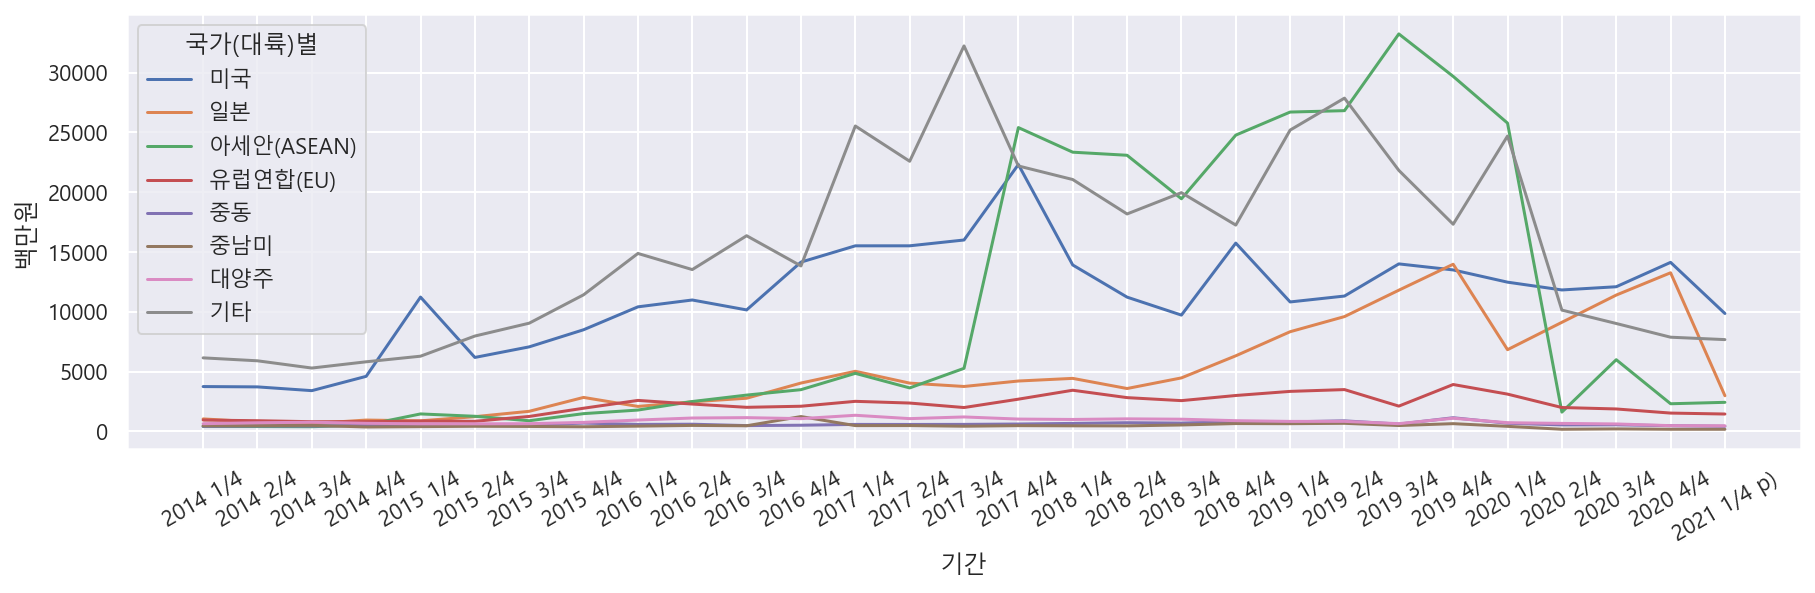

In [60]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"],x="기간",y="백만원",hue="국가(대륙)별")

- 2017년 아세안이 급격히 증가
- 일본도 꾸준히 증가

<AxesSubplot:xlabel='기간', ylabel='백만원'>

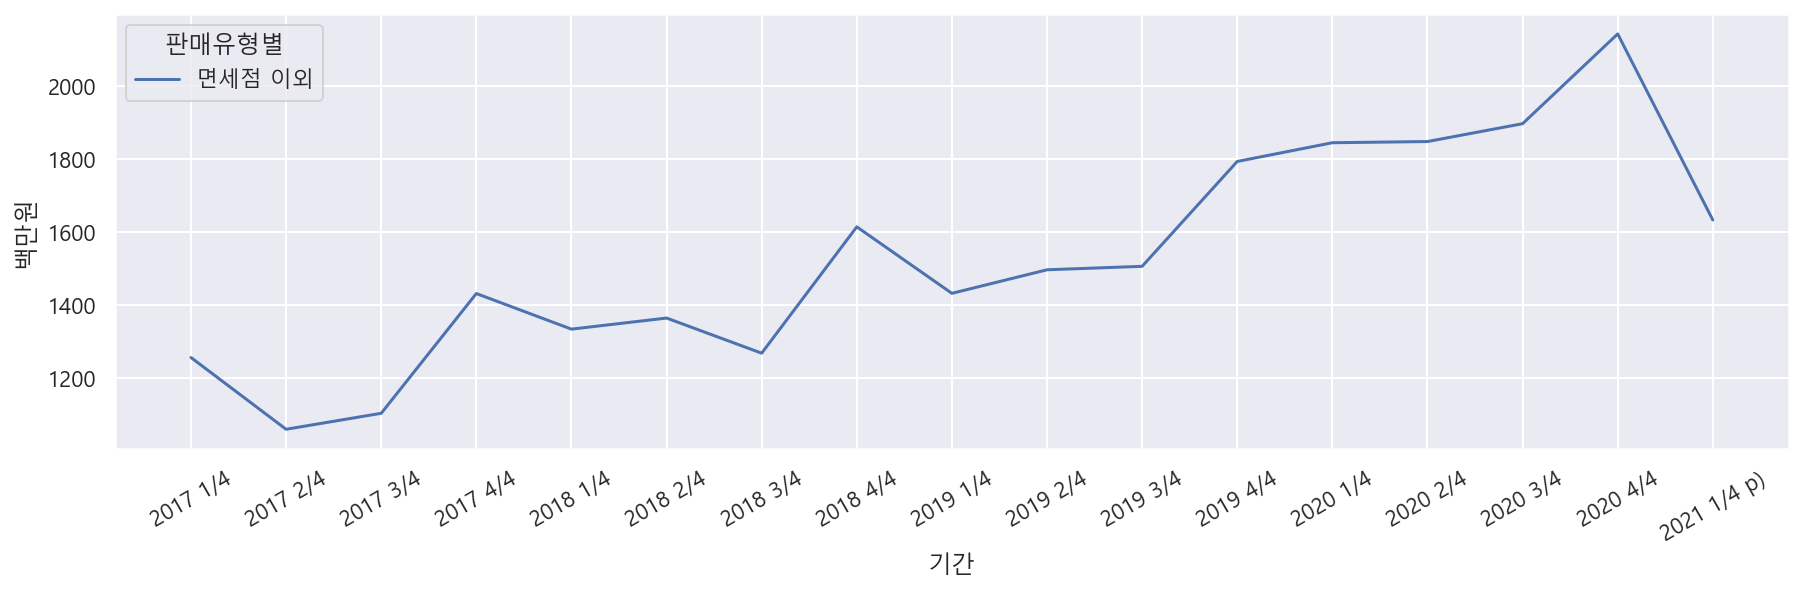

In [70]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub=df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
sns.lineplot(data=df_sub,x="기간",y="백만원",hue="판매유형별",ci=None)

- 2020년 4분기부터 감소

## 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [73]:
df_fashion=df[(df["상품군별"]=="의류 및 패션 관련상품") & (df["판매유형별"]=="계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1


<AxesSubplot:xlabel='기간', ylabel='백만원'>

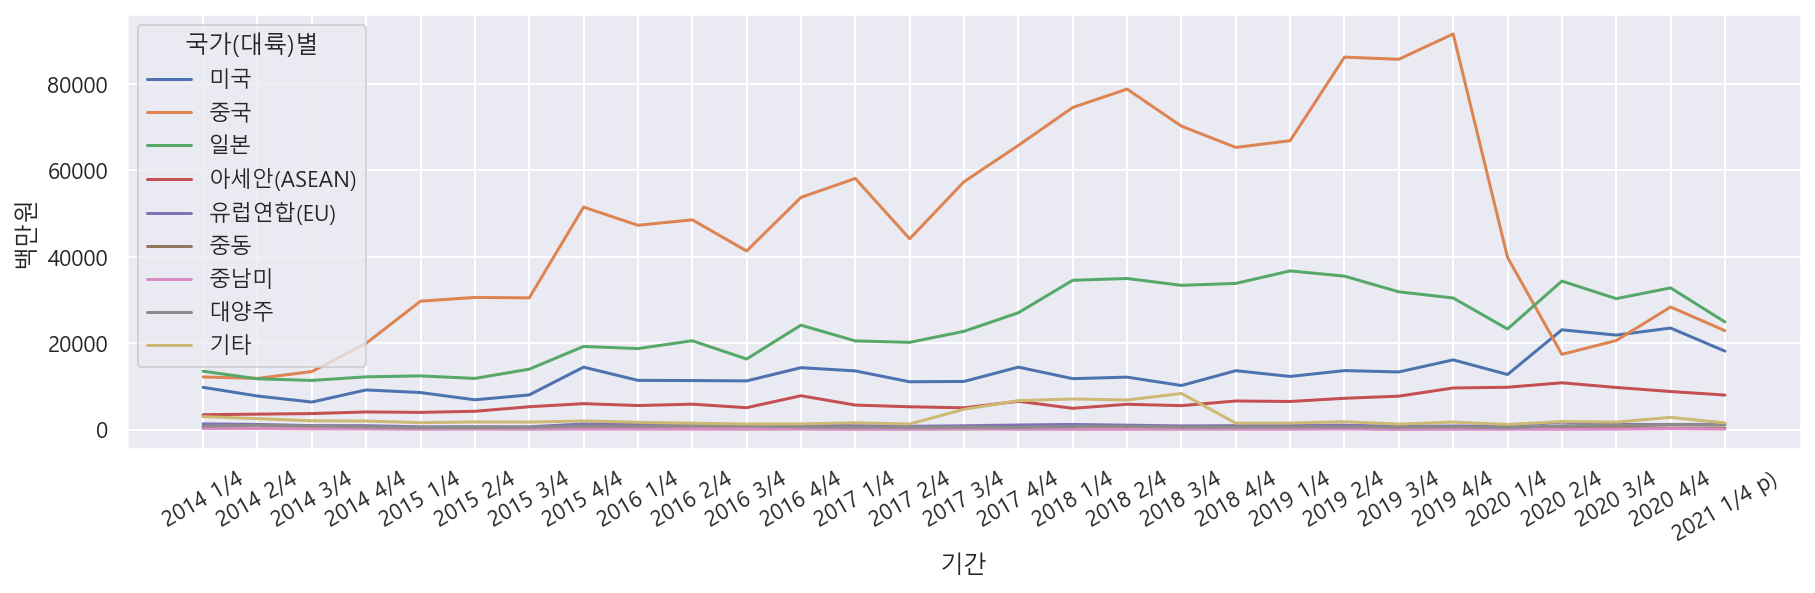

In [76]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)

sns.lineplot(data=df_fashion,x="기간",y="백만원",hue="국가(대륙)별")


- 2019년까지 중국> 일본 > 미국 순으로 판매액이 증가하고 있다.

<AxesSubplot:xlabel='기간', ylabel='백만원'>

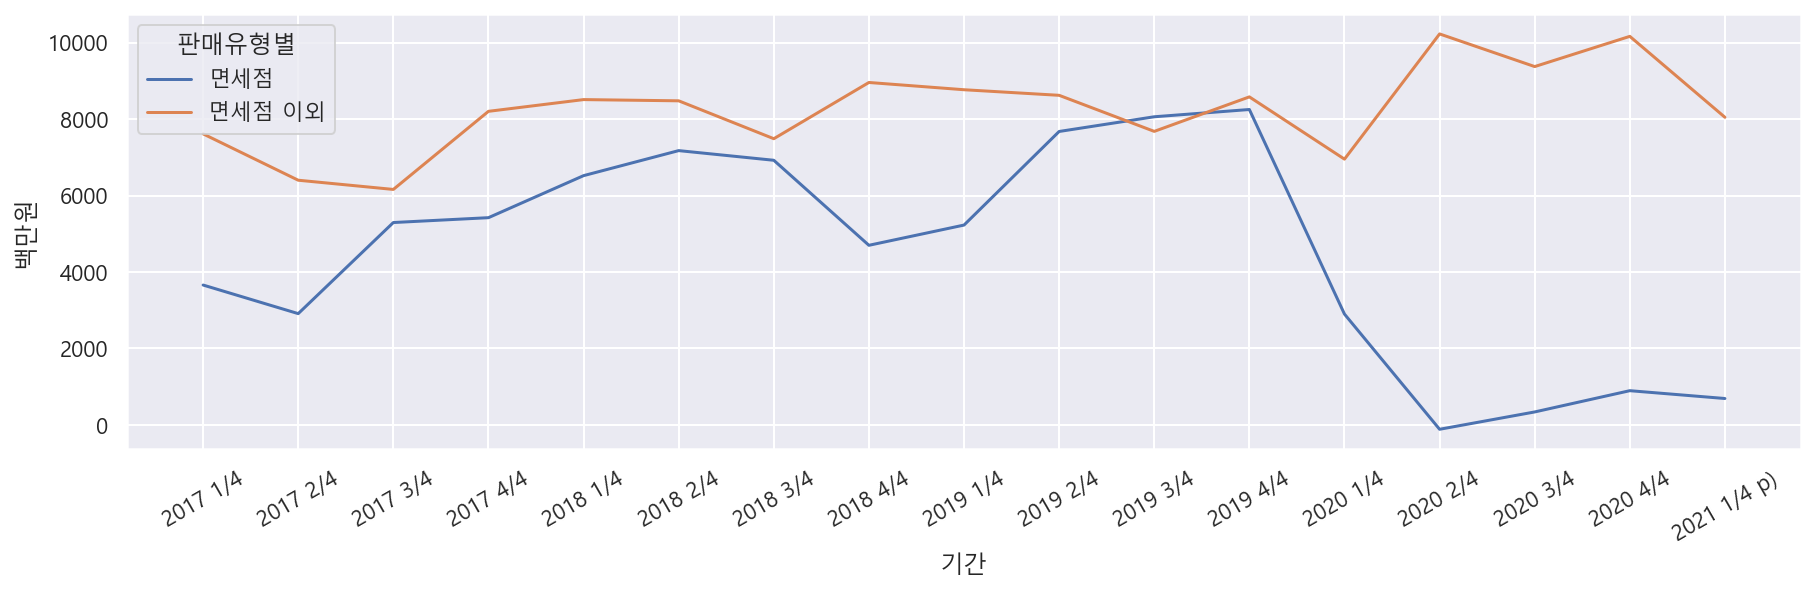

In [81]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_fashion2=df[(df["상품군별"]=="의류 및 패션 관련상품") & (df["판매유형별"]!="계")].copy()

sns.lineplot(data=df_fashion2,x="기간",y="백만원",hue="판매유형별",ci=None)

In [ ]:
2019년에는 면세점 이외에서 판매액이 면세점 판매액보다 많았지만, 2020년부터는 면세점 판매액이 급격히 감소하고 면세점 이외의 판매액은 유지된다.

## 데이터 집계하기

In [87]:
result=df_fashion.pivot_table(index="국가(대륙)별",columns="연도",values="백만원",aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019,2020,2021
국가(대륙)별,,,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0,7734.0,1585.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0,3686.0,1159.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0,81297.0,18181.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0,39313.0,8019.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0,5045.0,1282.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0,120817.0,24926.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0,106318.0,22919.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0,611.0,147.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0,1767.0,403.0


## 연산결과를 시각적으로 보기


<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

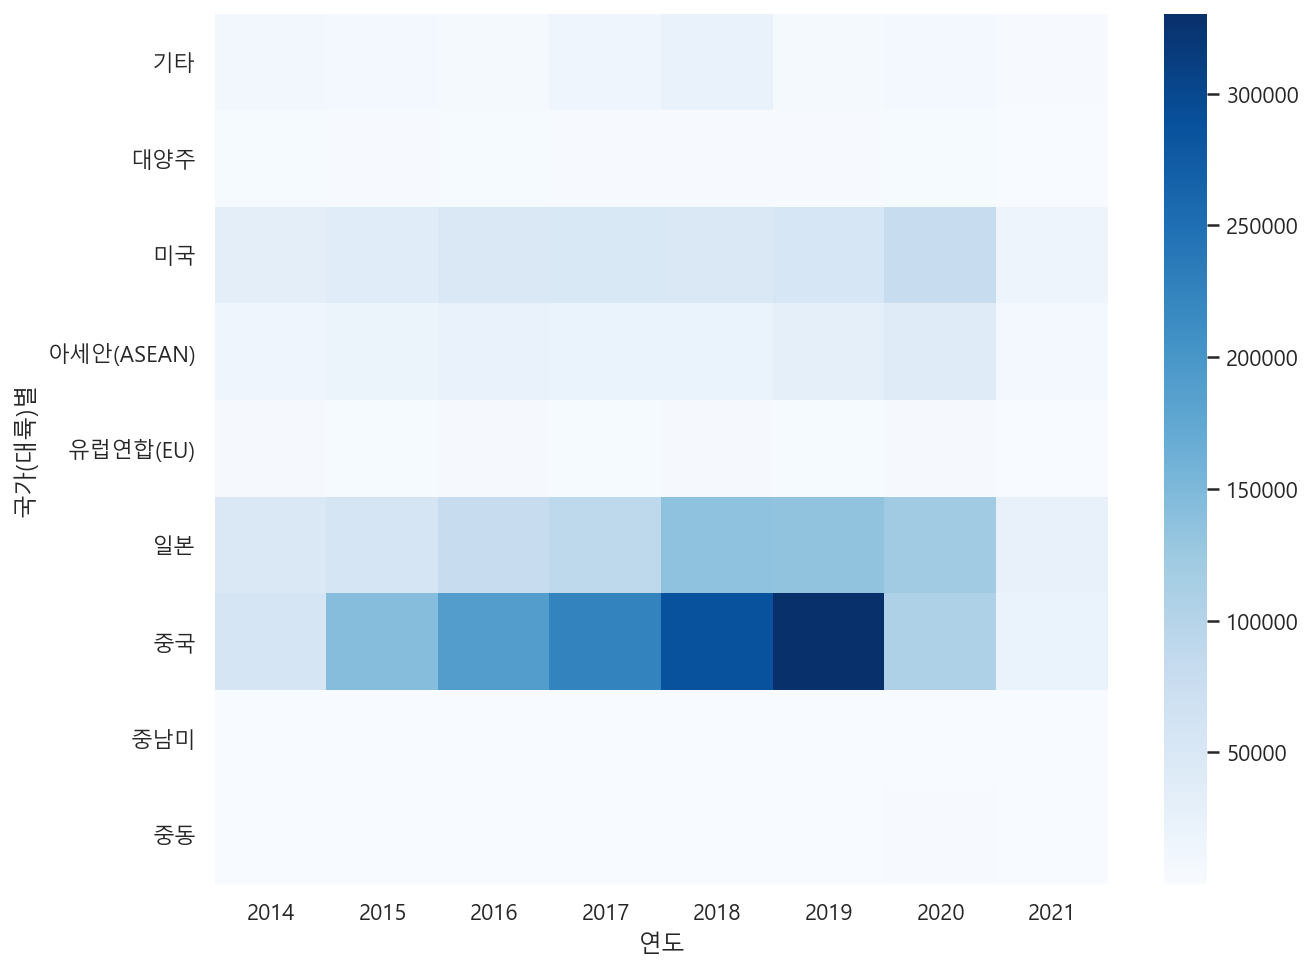

In [95]:
plt.figure(figsize=(10,8))
sns.heatmap(result,cmap="Blues")

- 중국에 판매액이 가장 높다.

# 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

<AxesSubplot:xlabel='연도', ylabel='백만원'>

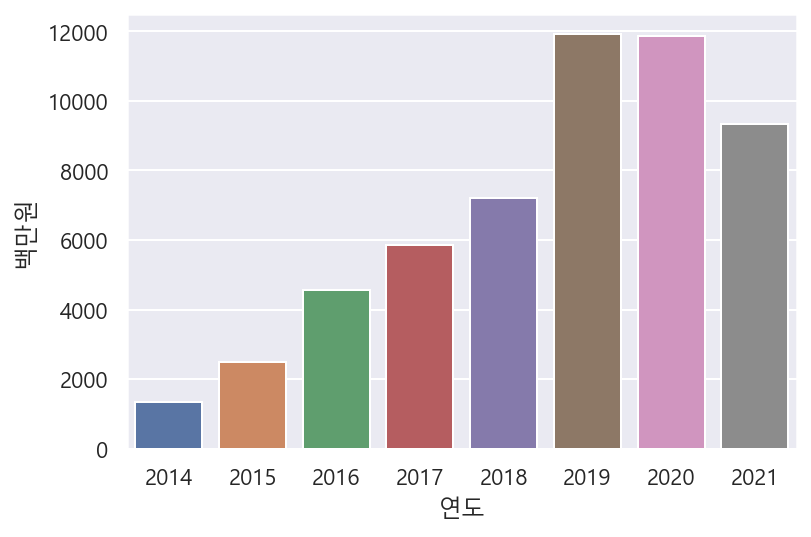

In [99]:
sns.barplot(data=df_total,x="연도",y="백만원",ci=None)

- 계속해서 증가 추세였다가 2021년에 감소하였다.

<AxesSubplot:xlabel='연도', ylabel='백만원'>

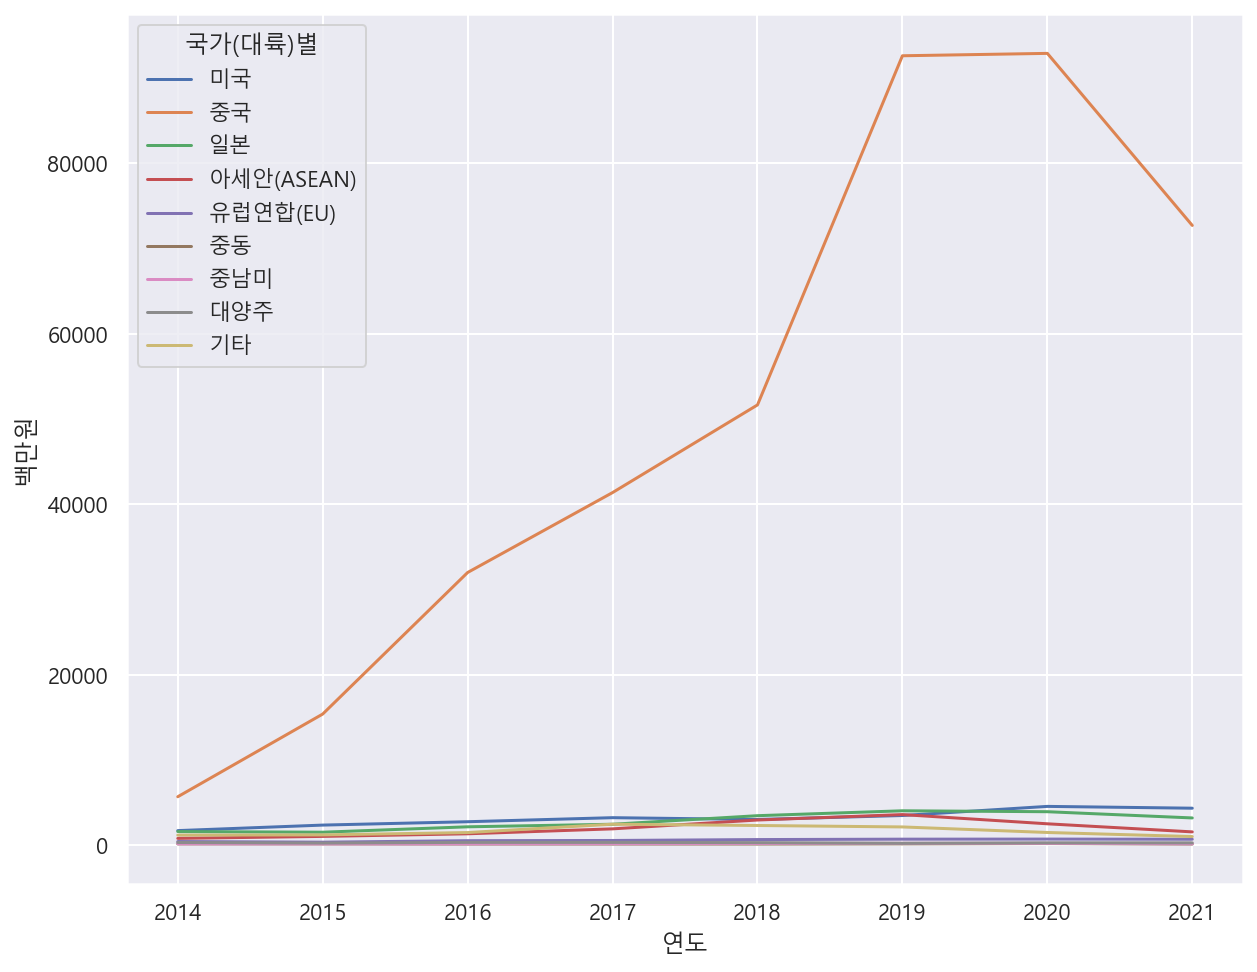

In [100]:
plt.figure(figsize=(10,8))

sns.lineplot(data=df_total,x="연도",y="백만원",hue="국가(대륙)별",ci=None)

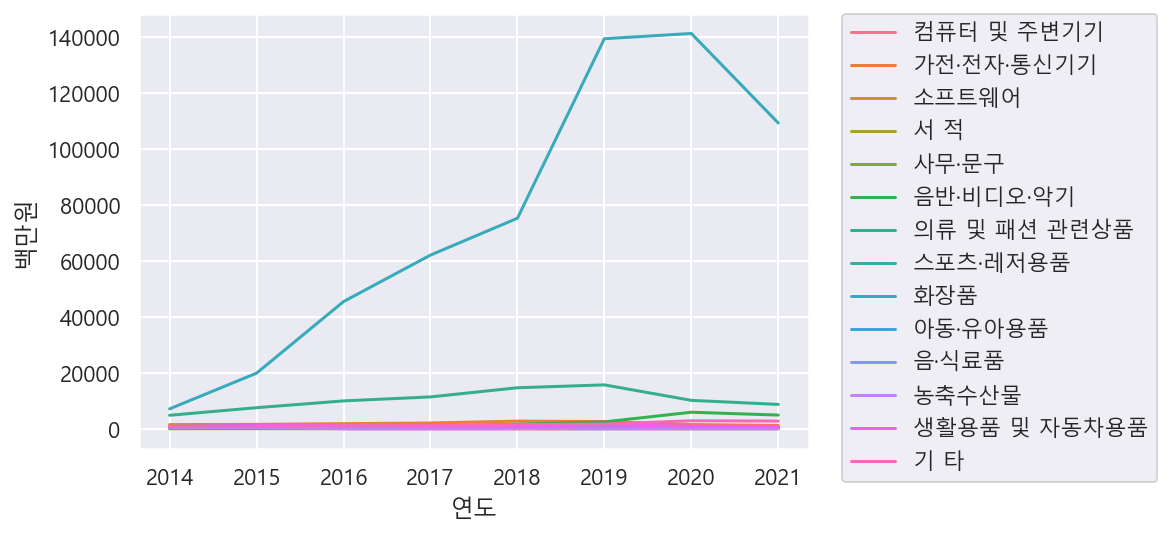

In [102]:
sns.lineplot(data=df_total,x="연도",y="백만원",hue="상품군별",ci=None)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.) 

- 2018년에서 2019년 의류 및 패션 관련 상품이 가장 급격히 증가했다가 2020년 이후로 감소